# **IBM Employees Attrition and Performance Analytics**

This data contains attrition and performance data and we are trying to find the patterns and factors affecting them using Exploratory Data Analysis.

Our null hypothesis is that only Monthly Income affects attrition

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

This data has no null values so we don't need to fill in the missing values

In [ ]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

This data is highly imbalanced

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#Univariate Analysis

<Axes: xlabel='Age', ylabel='Count'>

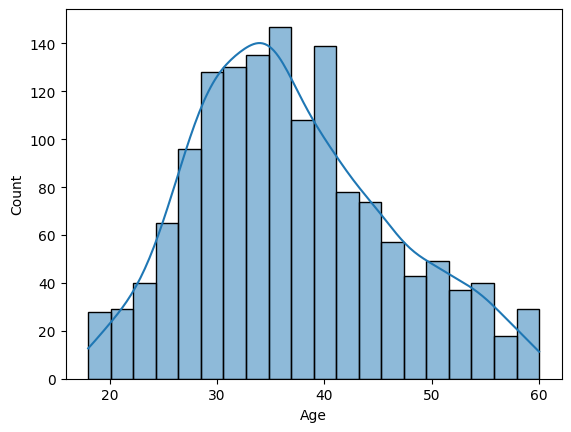

In [ ]:
sns.histplot(df['Age'], bins = 20, kde = True)

A majority of the employees in this company are between the ages of 30 and 40

<Axes: xlabel='Department', ylabel='Count'>

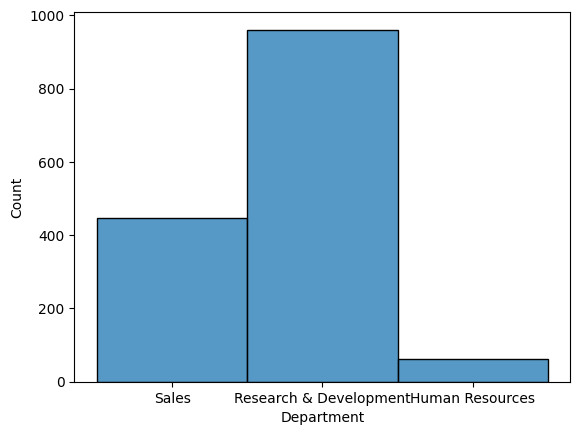

In [ ]:
sns.histplot(df['Department'])

Research and Development department contains majority of their employees and Human Resources are the least

<Axes: xlabel='DistanceFromHome', ylabel='Count'>

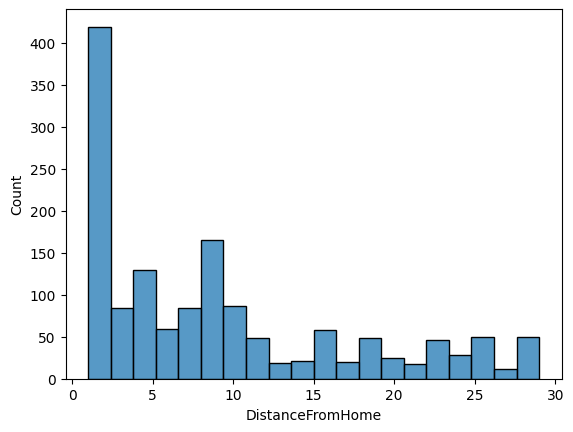

In [ ]:
sns.histplot(df['DistanceFromHome'], bins = 20)

Employees prefer to live near to their workplace whereas a few live very far

<Axes: xlabel='Education', ylabel='Count'>

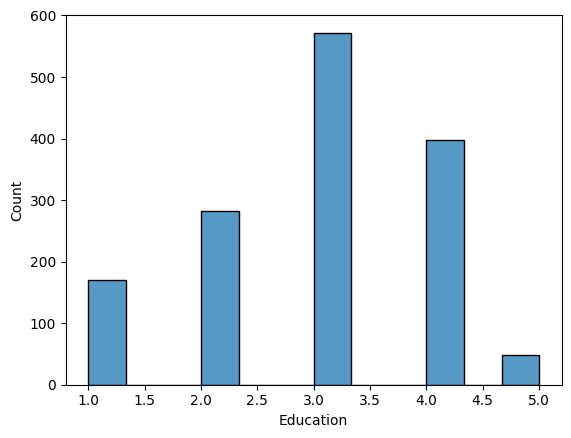

In [ ]:
sns.histplot(df['Education'])

Most common education level of employess is 3

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

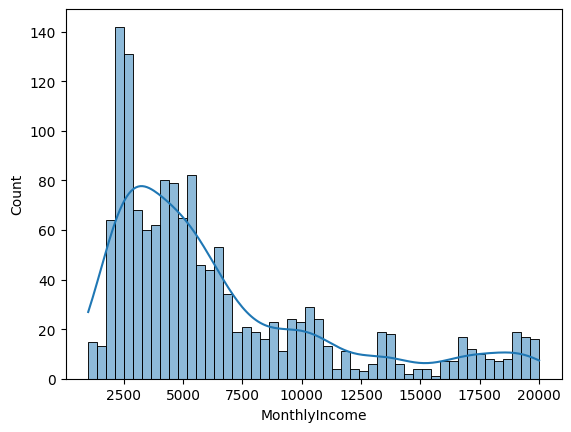

In [ ]:
sns.histplot(df['MonthlyIncome'], bins = 50, kde = True)

We can see that most people earn less than 7500 money unit monthly. The right skewness in salaries is normal as less people earn high salaries.

<Axes: xlabel='Gender', ylabel='Count'>

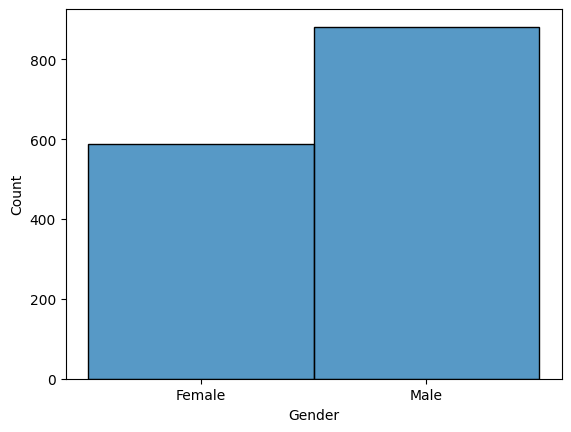

In [ ]:
sns.histplot(df['Gender'])

The majority of employees are male

<Axes: xlabel='JobSatisfaction', ylabel='Count'>

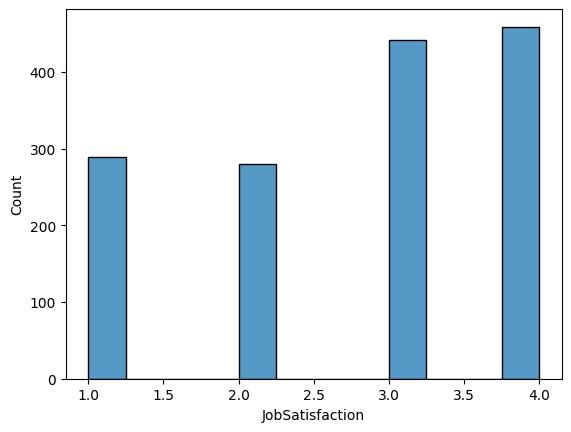

In [ ]:
sns.histplot(df['JobSatisfaction'])

This company has a high level of Job Satisfaction

<Axes: xlabel='WorkLifeBalance', ylabel='Count'>

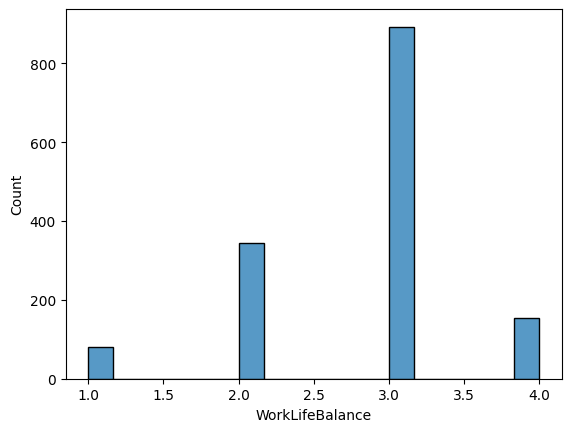

In [ ]:
sns.histplot(df['WorkLifeBalance'])

Decent Worklife Balance can be seen here

# Bivariate Analysis

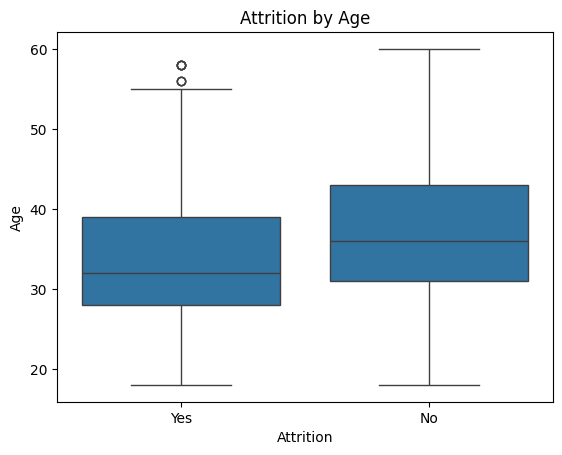

In [ ]:
sns.boxplot(df,y= 'Age',x='Attrition')
plt.title("Attrition by Age")
plt.show()

In [ ]:
y = df[df['Attrition'] == 'Yes']['Age']
n = df[df['Attrition'] == 'No']['Age']

t_score, p_value = sp.stats.ttest_ind(y,n)
print(f' T score: {t_score}')
print(f' p_value:  {p_value}')

 T score: -6.178663835307217
 p_value:  8.356308021103587e-10


Younger Employees tend to leave the company more

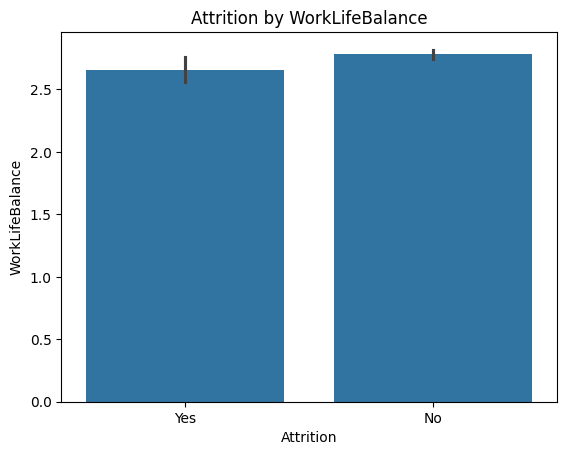

In [ ]:
sns.barplot(df,y= 'WorkLifeBalance',x='Attrition')
plt.title("Attrition by WorkLifeBalance")
plt.show()

In [ ]:
y = df[df['Attrition'] == 'Yes']['WorkLifeBalance']
n = df[df['Attrition'] == 'No']['WorkLifeBalance']

t_score, p_value = sp.stats.ttest_ind(y,n)
print(f' T score: {t_score}')
print(f' p_value:  {p_value}')

 T score: -2.4548148934297767
 p_value:  0.014211054989021308


Employees having a higher worklife balance tend to stay in this company

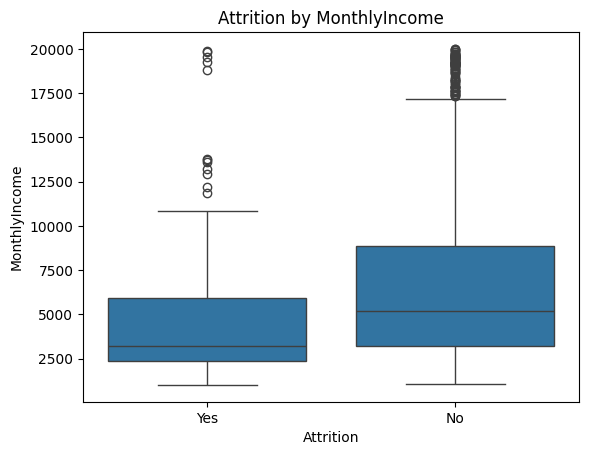

In [ ]:
sns.boxplot(df,y= 'MonthlyIncome',x='Attrition')
plt.title("Attrition by MonthlyIncome")
plt.show()

In [ ]:
y = df[df['Attrition'] == 'Yes']['MonthlyIncome']
n = df[df['Attrition'] == 'No']['MonthlyIncome']

t_score, p_value = sp.stats.ttest_ind(y,n)
print(f' T score: {t_score}')
print(f' p_value:  {p_value}')

 T score: -6.203935765608938
 p_value:  7.14736398535381e-10


Employees having less income leave the company more. The T-test also confirms this and we can say that monthly income affects Attrition

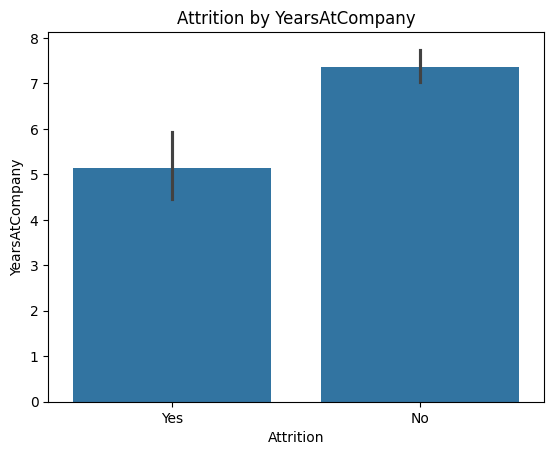

In [ ]:
sns.barplot(df,y= 'YearsAtCompany',x='Attrition')
plt.title("Attrition by YearsAtCompany")
plt.show()

In [ ]:
y = df[df['Attrition'] == 'Yes']['YearsAtCompany']
n = df[df['Attrition'] == 'No']['YearsAtCompany']

t_score, p_value = sp.stats.ttest_ind(y,n)
print(f' T score: {t_score}')
print(f' p_value:  {p_value}')

 T score: -5.1963086670254235
 p_value:  2.3188716103863033e-07


Employees who tend to stay longer in the company are most unlikely to leave the company

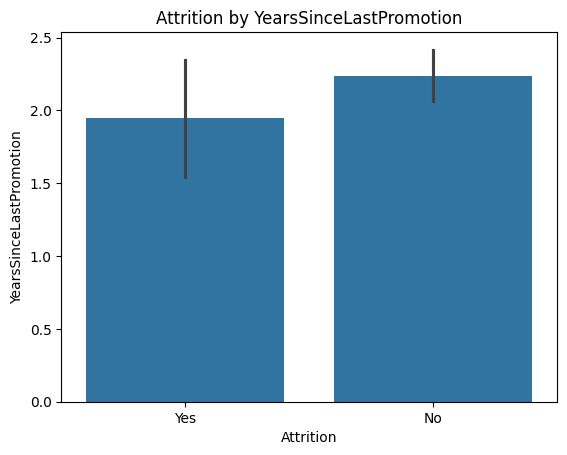

In [ ]:
sns.barplot(df,y= 'YearsSinceLastPromotion',x='Attrition')
plt.title("Attrition by YearsSinceLastPromotion")
plt.show()

In [ ]:
y = df[df['Attrition'] == 'Yes']['YearsSinceLastPromotion']
n = df[df['Attrition'] == 'No']['YearsSinceLastPromotion']

t_score, p_value = sp.stats.ttest_ind(y,n)
print(f' T score: {t_score}')
print(f' p_value:  {p_value}')

 T score: -1.2657876620135298
 p_value:  0.2057899591624936


Years since Last Promotion does not affect Attrition of an Employee. The T-test also confirms this

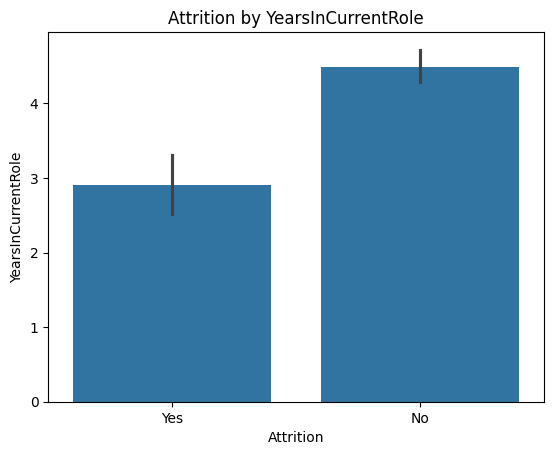

In [ ]:
sns.barplot(df,y= 'YearsInCurrentRole',x='Attrition')
plt.title("Attrition by YearsInCurrentRole")
plt.show()

In [ ]:
y = df[df['Attrition'] == 'Yes']['YearsInCurrentRole']
n = df[df['Attrition'] == 'No']['YearsInCurrentRole']

t_score, p_value = sp.stats.ttest_ind(y,n)
print(f' T score: {t_score}')
print(f' p_value:  {p_value}')

 T score: -6.232038413295282
 p_value:  6.003185843641377e-10


Surprisingly, Employees who stay longer in their current role tend to stay even longer and not leave.

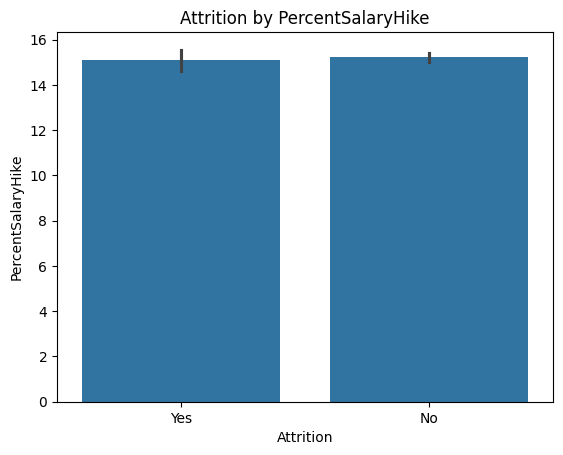

In [ ]:
sns.barplot(df,y= 'PercentSalaryHike',x='Attrition')
plt.title("Attrition by PercentSalaryHike")
plt.show()

In [ ]:
y = df[df['Attrition'] == 'Yes']['PercentSalaryHike']
n = df[df['Attrition'] == 'No']['PercentSalaryHike']

t_score, p_value = sp.stats.ttest_ind(y,n)
print(f' T score: {t_score}')
print(f' p_value:  {p_value}')

 T score: -0.5164573250747643
 p_value:  0.6056128238893757


The T-test confirms that Percent Salry Hike does not affect Attrition of an Employee

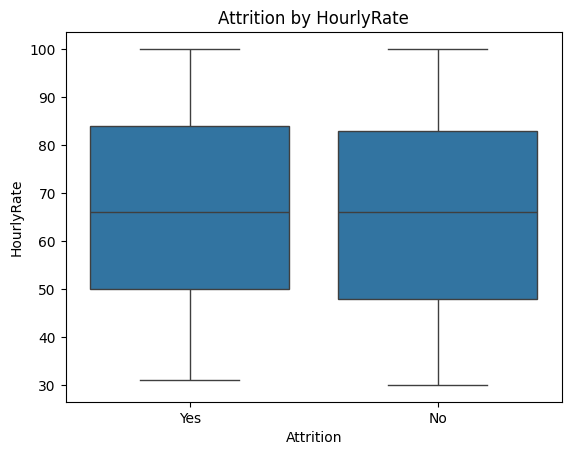

In [ ]:
sns.boxplot(df,y= 'HourlyRate',x='Attrition')
plt.title("Attrition by HourlyRate")
plt.show()

In [ ]:
y = df[df['Attrition'] == 'Yes']['HourlyRate']
n = df[df['Attrition'] == 'No']['HourlyRate']

t_score, p_value = sp.stats.ttest_ind(y,n)
print(f' T score: {t_score}')
print(f' p_value:  {p_value}')

 T score: -0.26228987349264493
 p_value:  0.7931347689944243


Hourly Rate also doesn't influence the employees' decision to leave the company.

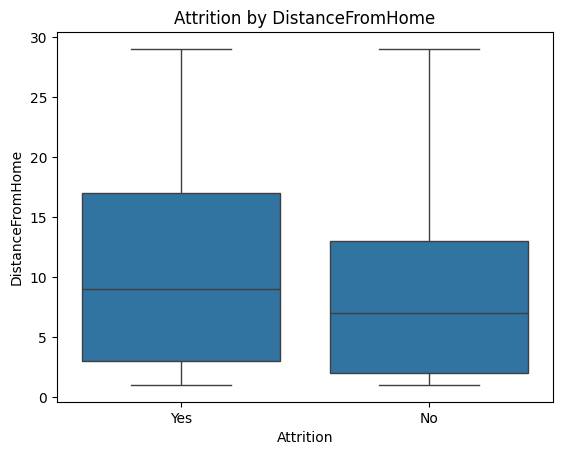

In [ ]:
sns.boxplot(df,y= 'DistanceFromHome',x='Attrition')
plt.title("Attrition by DistanceFromHome")
plt.show()

In [ ]:
y = df[df['Attrition'] == 'Yes']['DistanceFromHome']
n = df[df['Attrition'] == 'No']['DistanceFromHome']

t_score, p_value = sp.stats.ttest_ind(y,n)
print(f' T score: {t_score}')
print(f' p_value:  {p_value}')

 T score: 2.994708098265125
 p_value:  0.0027930600802134266


The distance from home does influence an employee's decision to leave the company. If the distance to work is more than **9**, employees are more likely to change jobs.

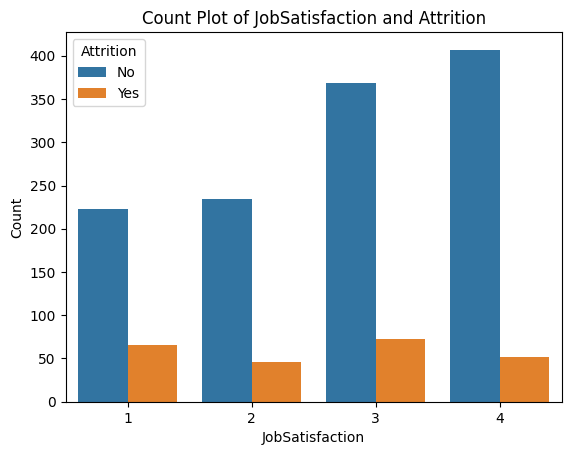

In [ ]:
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('Count Plot of JobSatisfaction and Attrition')
plt.xlabel('JobSatisfaction')
plt.ylabel('Count')
plt.show()

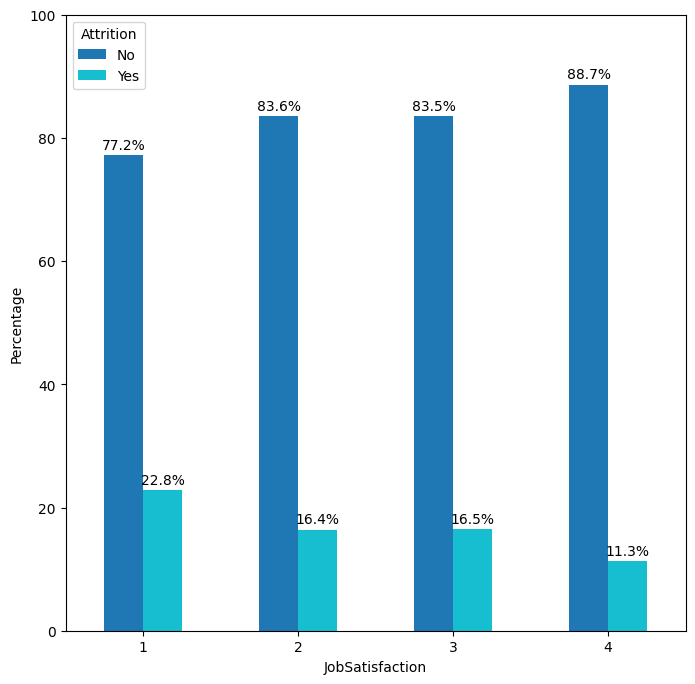

In [ ]:
temp = df.groupby('JobSatisfaction')["Attrition"].value_counts(normalize=True).unstack() * 100
temp.plot(kind='bar', stacked=False, figsize = (8,8), ylabel = 'Percentage', rot = 0, cmap = 'tab10')
plt.ylim(0, 100)

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height:.1f}%', ha='center', va='bottom')

In [ ]:
contingency_table = pd.crosstab(df['Attrition'], df['JobSatisfaction'])
chi2, p, dof, expected = sp.stats.chi2_contingency(contingency_table)
print(f'Chi squared score: {chi2}')
print(f'p_value: {p}')

Chi squared score: 17.505077010348
p_value: 0.0005563004510387556


Employees with high level of job satisfaction tend to stay and with low level of Job satisfaction tend to leave

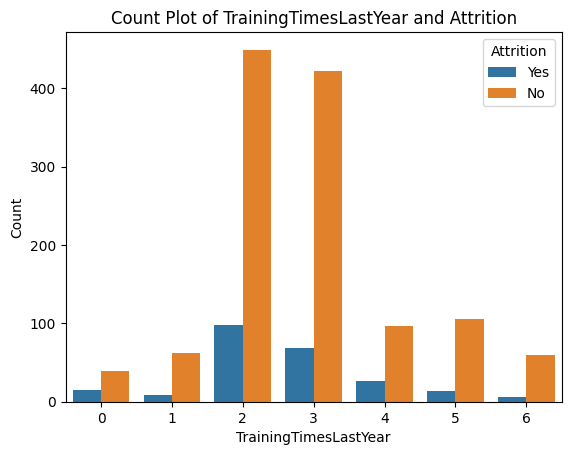

In [ ]:
sns.countplot(x='TrainingTimesLastYear', hue='Attrition', data=df)
plt.title('Count Plot of TrainingTimesLastYear and Attrition')
plt.xlabel('TrainingTimesLastYear')
plt.ylabel('Count')
plt.show()

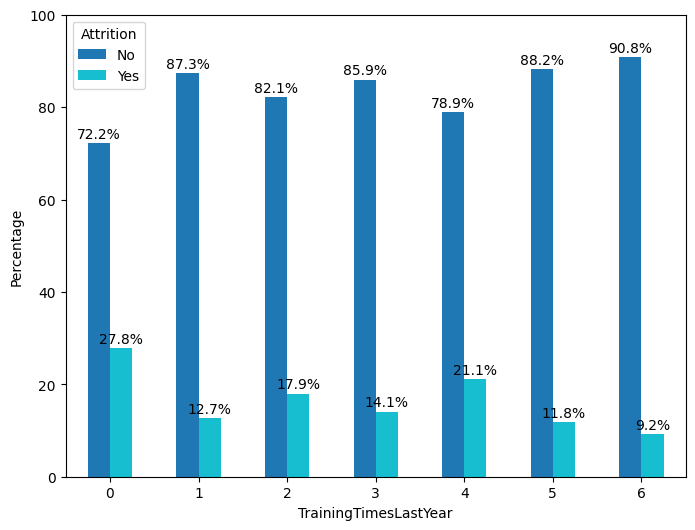

In [ ]:
temp = df.groupby('TrainingTimesLastYear')["Attrition"].value_counts(normalize=True).unstack() * 100
temp.plot(kind='bar', stacked=False, figsize = (8,6), ylabel = 'Percentage', rot = 0, cmap = 'tab10')
plt.ylim(0, 100)

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height:.1f}%', ha='center', va='bottom')

In [ ]:
contingency_table = pd.crosstab(df['Attrition'], df['TrainingTimesLastYear'])
chi2, p, dof, expected = sp.stats.chi2_contingency(contingency_table)
print(f'Chi squared score: {chi2}')
print(f'p_value: {p}')

Chi squared score: 15.146451478483337
p_value: 0.01914772986009514


It is more common for employees with less training times to leave the company than those with high training times.

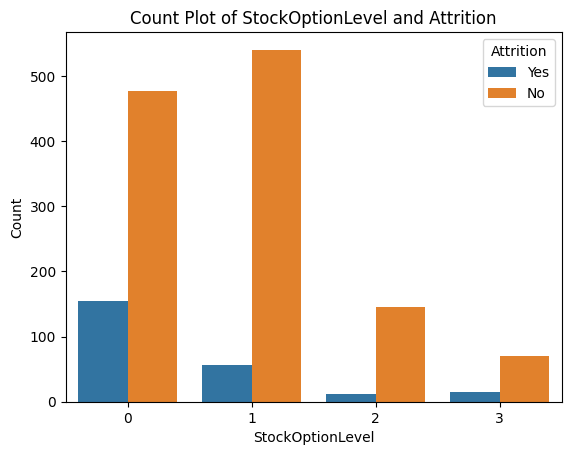

In [ ]:
sns.countplot(x='StockOptionLevel', hue='Attrition', data=df)
plt.title('Count Plot of StockOptionLevel and Attrition')
plt.xlabel('StockOptionLevel')
plt.ylabel('Count')
plt.show()

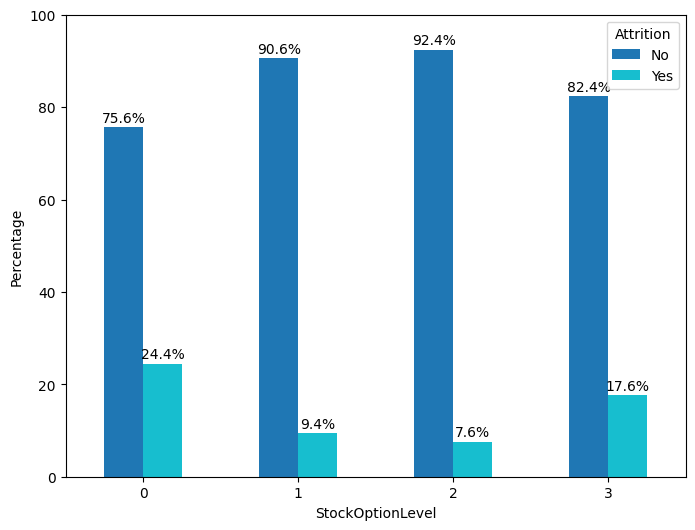

In [ ]:
temp = df.groupby('StockOptionLevel')["Attrition"].value_counts(normalize=True).unstack() * 100
temp.plot(kind='bar', stacked=False, figsize = (8,6), ylabel = 'Percentage', rot = 0, cmap = 'tab10')
plt.ylim(0, 100)

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height:.1f}%', ha='center', va='bottom')

In [ ]:
contingency_table = pd.crosstab(df['Attrition'], df['StockOptionLevel'])
chi2, p, dof, expected = sp.stats.chi2_contingency(contingency_table)
print(f'Chi squared score: {chi2}')
print(f'p_value: {p}')

Chi squared score: 60.59830108612225
p_value: 4.379390336108354e-13


Stock option level does affect the empoyee attrition but it does not appear to be linear

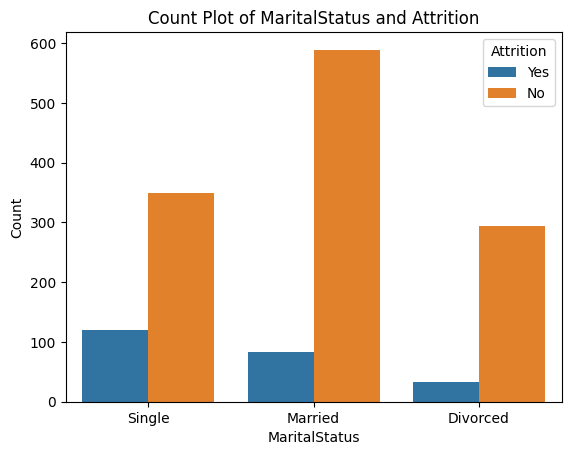

In [ ]:
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
plt.title('Count Plot of MaritalStatus and Attrition')
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
plt.show()

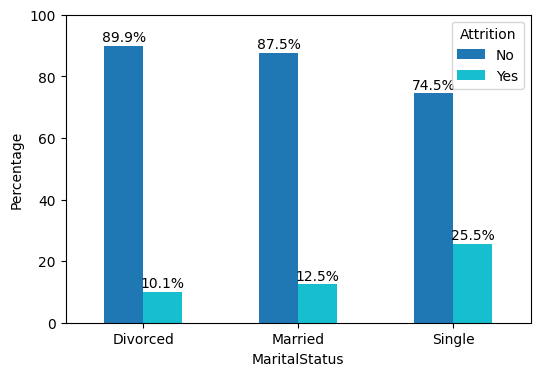

In [ ]:
temp = df.groupby('MaritalStatus')["Attrition"].value_counts(normalize=True).unstack() * 100
temp.plot(kind='bar', stacked=False, figsize = (6,4), ylabel = 'Percentage', rot = 0, cmap = 'tab10')
plt.ylim(0, 100)

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height:.1f}%', ha='center', va='bottom')

In [ ]:
contingency_table = pd.crosstab(df['Attrition'], df['MaritalStatus'])
chi2, p, dof, expected = sp.stats.chi2_contingency(contingency_table)
print(f'Chi squared score: {chi2}')
print(f'p_value: {p}')

Chi squared score: 46.163676540848705
p_value: 9.45551106034083e-11


Single Employees leave the company more than the Divorced or Married ones

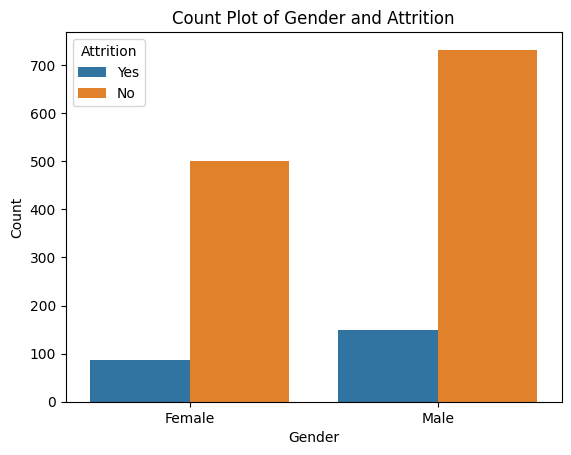

In [ ]:
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Count Plot of Gender and Attrition')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

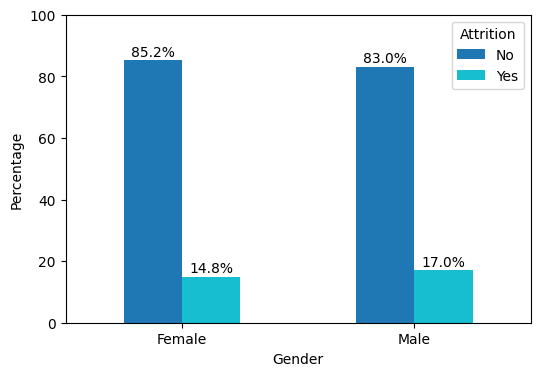

In [ ]:
temp = df.groupby('Gender')["Attrition"].value_counts(normalize=True).unstack() * 100
temp.plot(kind='bar', stacked=False, figsize = (6,4), ylabel = 'Percentage', rot = 0, cmap = 'tab10')
plt.ylim(0, 100)

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height:.1f}%', ha='center', va='bottom')

In [ ]:
contingency_table = pd.crosstab(df['Attrition'], df['Gender'])
chi2, p, dof, expected = sp.stats.chi2_contingency(contingency_table)
print(f'Chi squared score: {chi2}')
print(f'p_value: {p}')

Chi squared score: 1.1169671241970975
p_value: 0.29057244902890855


The graph shows male Employees have a higher attrition than females but the Chi Squared test shows that Gender has no significant affect on Attrition

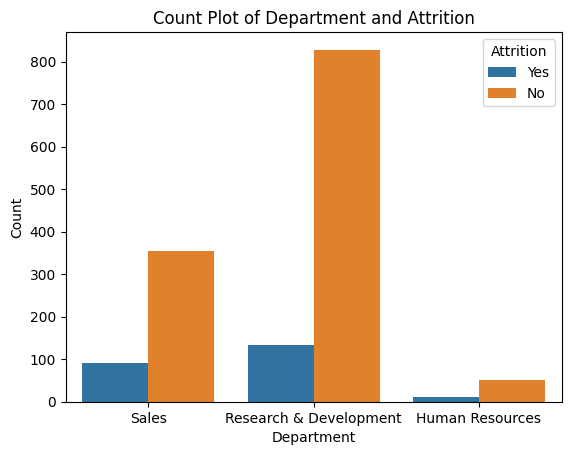

In [ ]:
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Count Plot of Department and Attrition')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

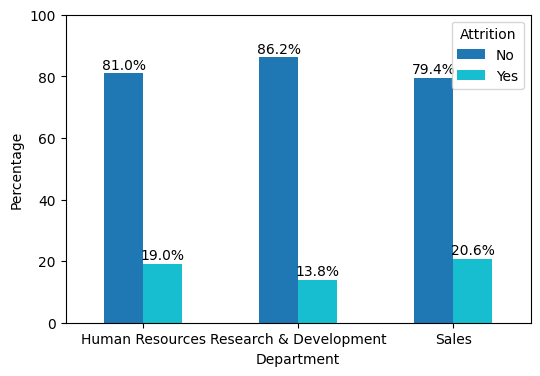

In [ ]:
temp = df.groupby('Department')["Attrition"].value_counts(normalize=True).unstack() * 100
temp.plot(kind='bar', stacked=False, figsize = (6,4), ylabel = 'Percentage', rot = 0, cmap = 'tab10')
plt.ylim(0, 100)

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height:.1f}%', ha='center', va='bottom')

In [ ]:
contingency_table = pd.crosstab(df['Attrition'], df['Department'])
chi2, p, dof, expected = sp.stats.chi2_contingency(contingency_table)
print(f'Chi squared score: {chi2}')
print(f'p_value: {p}')

Chi squared score: 10.79600732241067
p_value: 0.004525606574479633


Employees in Reasearch and Development tend to stay longer in the company than thw ones in Sales and Human Resource Department

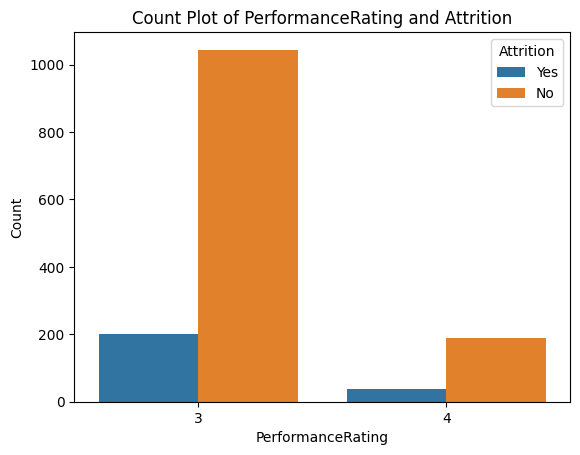

In [ ]:
sns.countplot(x='PerformanceRating', hue='Attrition', data=df)
plt.title('Count Plot of PerformanceRating and Attrition')
plt.xlabel('PerformanceRating')
plt.ylabel('Count')
plt.show()

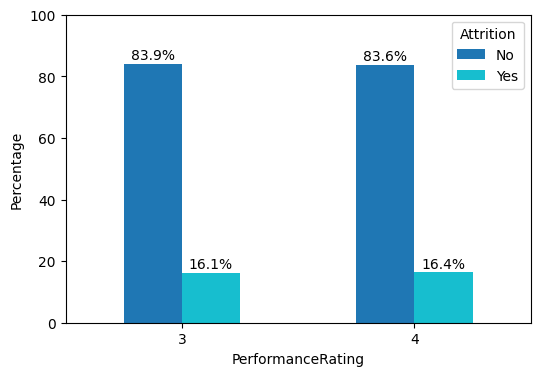

In [ ]:
temp = df.groupby('PerformanceRating')["Attrition"].value_counts(normalize=True).unstack() * 100
temp.plot(kind='bar', stacked=False, figsize = (6,4), ylabel = 'Percentage', rot = 0, cmap = 'tab10')
plt.ylim(0, 100)

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height:.1f}%', ha='center', va='bottom')

In [ ]:
contingency_table = pd.crosstab(df['Attrition'], df['PerformanceRating'])
chi2, p, dof, expected = sp.stats.chi2_contingency(contingency_table)
print(f'Chi squared score: {chi2}')
print(f'p_value: {p}')

Chi squared score: 0.00015475439428271534
p_value: 0.9900745465934576


Performance Rating doesn't affect Attrition thanks to Chi Squared Test

# Multivariate Analysis

Text(0.5, 1.0, 'Attrition vs Distance From Home by Gender')

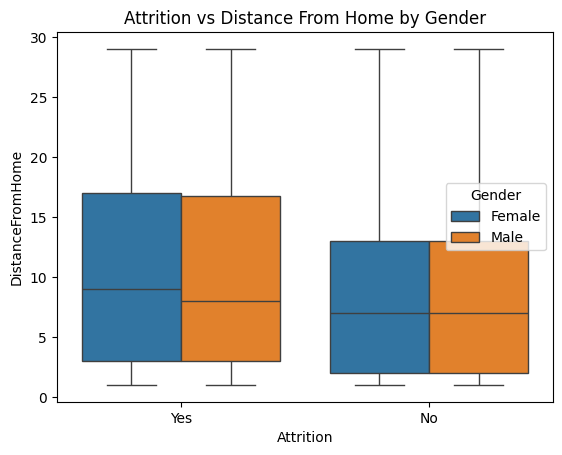

In [ ]:
sns.boxplot(df,x='Attrition',y='DistanceFromHome',hue='Gender')
plt.title('Attrition vs Distance From Home by Gender')

We can see that women who leave their jobs tend to live 9 Distance Units on average away from their jobs. This is slightly higher than the average for men

Text(0.5, 1.0, 'Attrition by Monthly Income by Gender')

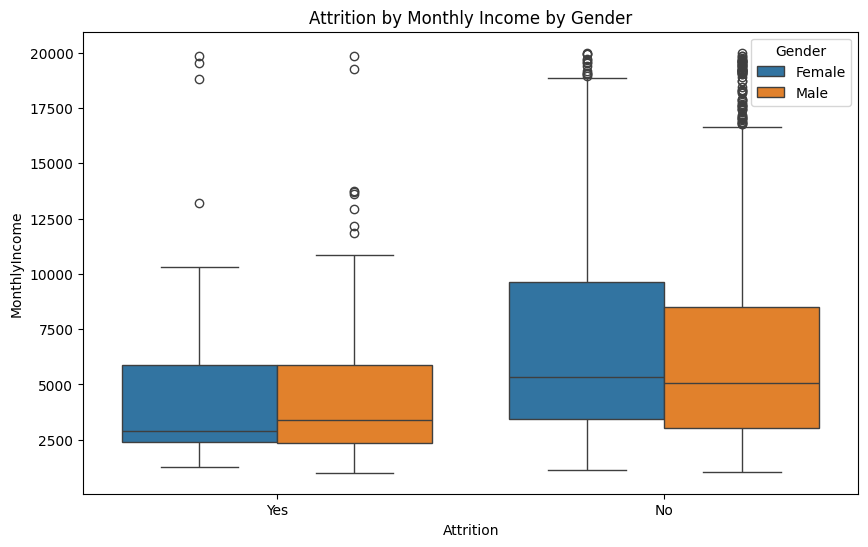

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(df,x='Attrition',y='MonthlyIncome',hue='Gender')
plt.title('Attrition by Monthly Income by Gender')

We can see that the average salary of women who leave is apparently less than that of men.

Text(0.5, 1.0, 'Attrition by Monthly Income and Department')

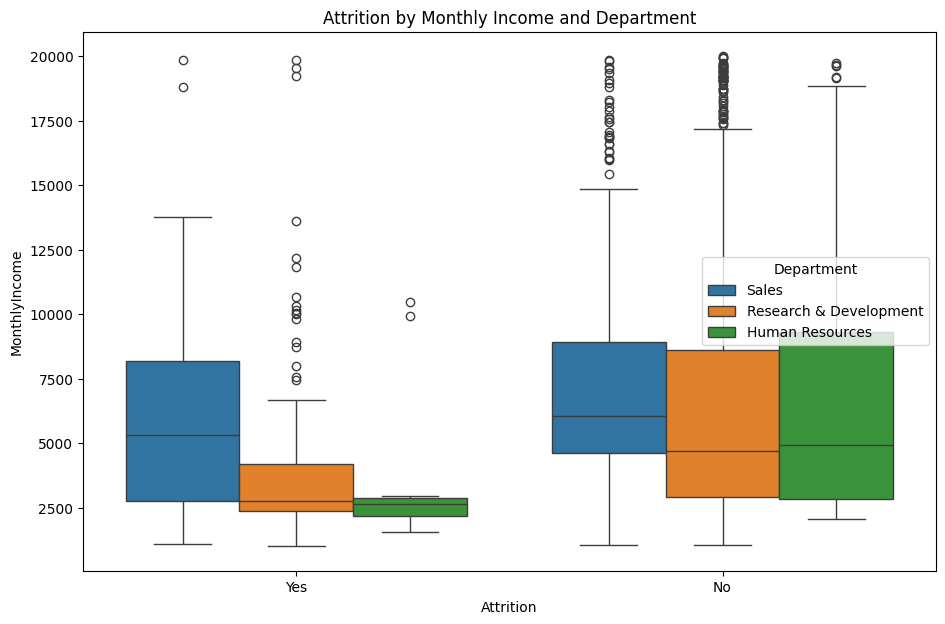

In [ ]:
plt.figure(figsize=(11, 7))
sns.boxplot(df,x='Attrition',y='MonthlyIncome',hue='Department')
plt.title('Attrition by Monthly Income and Department')

Sales Depatment Employees with average Monthly Income of less than 6000 tend to leave more than any other department

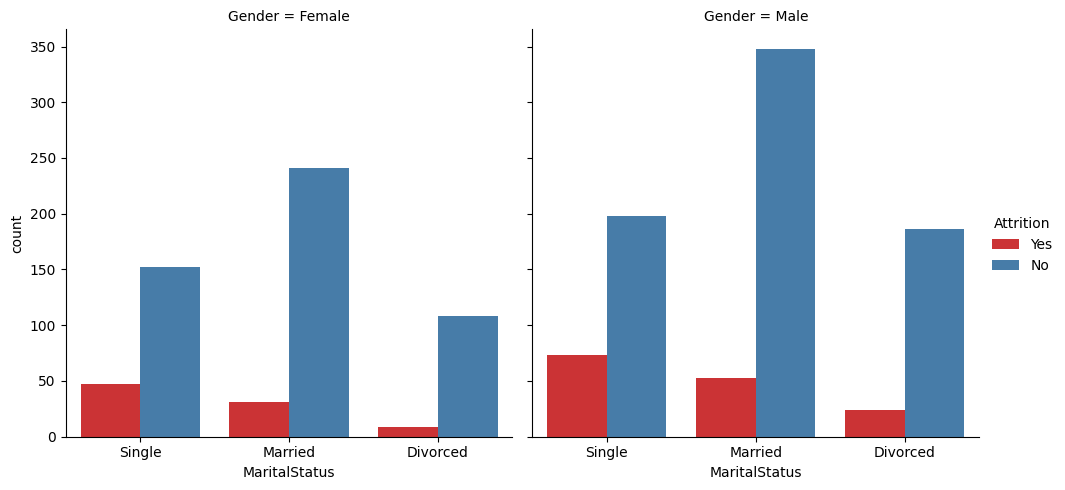

In [ ]:
sns.catplot(data = df, kind = 'count', x = 'MaritalStatus', hue = 'Attrition', col = 'Gender', palette = 'Set1')

In all the above cases Female Employees have much less tendency to leave their current jobs rather than the Male Emlopyees

# Conclusion



*   We can confidently say that age, job satisfaction, monthly income, marital status,department, years at company and years in current role play a huge role in employees' attrition.
*  Also, Gender, Salary increase percentage and performance ratings are not significantly impacting the employees decision to leave the company.
